In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Load DataSet

In [3]:
cvd = pd.read_csv("C:/Users/swaroop/Desktop/Great Learning/For Github/Covid19/covid_19_india.csv")

In [4]:
cvd.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [141]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7786 entries, 0 to 7785
Data columns (total 9 columns):
Sno                         7786 non-null int64
Date                        7786 non-null object
Time                        7786 non-null object
State/UnionTerritory        7786 non-null object
ConfirmedIndianNational     7786 non-null object
ConfirmedForeignNational    7786 non-null object
Cured                       7786 non-null int64
Deaths                      7786 non-null int64
Confirmed                   7786 non-null int64
dtypes: int64(4), object(5)
memory usage: 547.5+ KB


### Check missing values

In [142]:
cvd.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

### Drop the unwanted columns

In [143]:
cvd= cvd.drop(['Time','Sno','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)


In [145]:
cvd.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


In [146]:
cvd.shape

(7786, 5)

In [147]:
cvd.describe()

,Cured,Deaths,Confirmed
count,7786.000000,7786.000000,7786.000000
mean,47967.532366,1051.592088,60368.934113
std,132508.559635,3638.415694,159967.980894
min,0.000000,0.000000,0.000000
25%,55.000000,1.000000,252.000000
50%,2234.500000,34.000000,3676.000000
75%,26419.500000,548.750000,38140.500000
max,1470660.000000,43348.000000,1648665.000000


In [148]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7786 entries, 0 to 7785
Data columns (total 5 columns):
Date                    7786 non-null object
State/UnionTerritory    7786 non-null object
Cured                   7786 non-null int64
Deaths                  7786 non-null int64
Confirmed               7786 non-null int64
dtypes: int64(3), object(2)
memory usage: 304.2+ KB


In [149]:
cvd.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

In [150]:
cvd.columns = cvd.columns.str.replace('State/UnionTerritory','State')

In [151]:
cvd.head()

,Date,State,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


## Exploratory Data Analysis

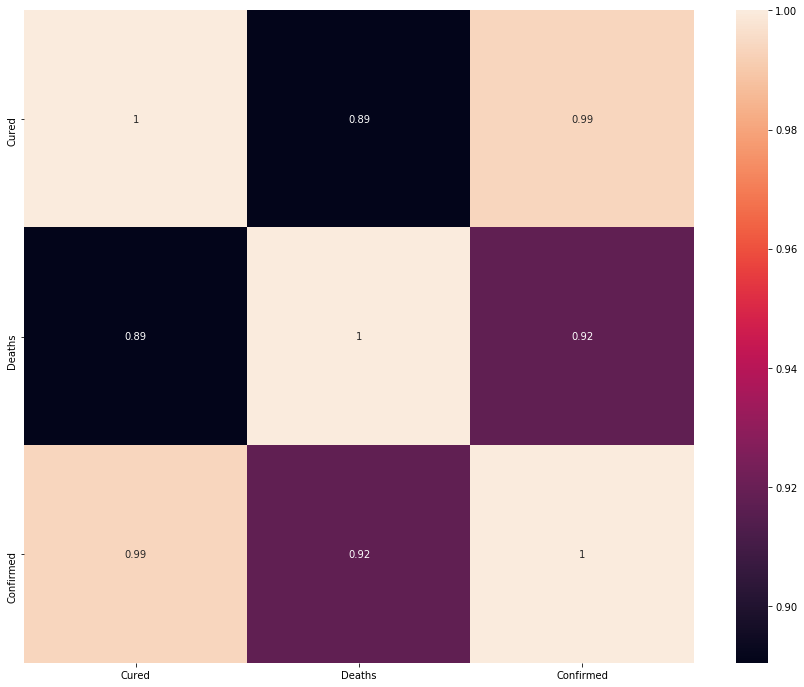

In [152]:
plt.subplots(figsize=(15,12))
sns.heatmap(cvd.corr(), annot=True)

## BoxPlot

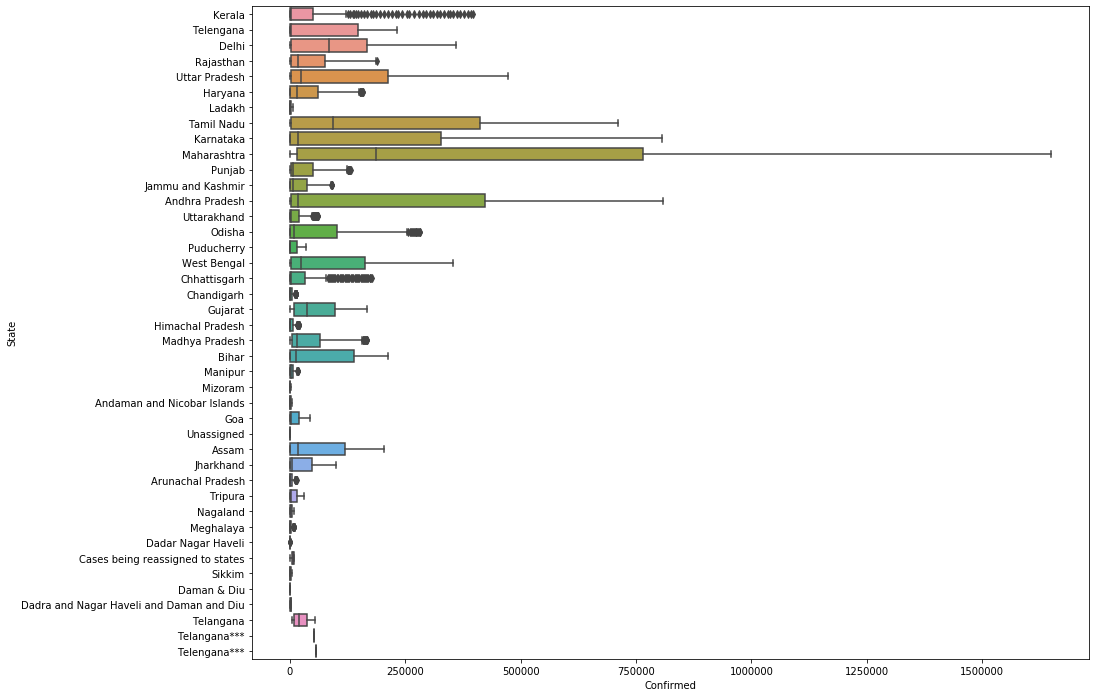

In [153]:
plt.subplots(figsize=(15,12))
sns.boxplot(x="Confirmed", y="State",data=cvd)

### Inference:
#### From the above graph it shows that no of confirmed cases are higher in Maharashtra followed by Karnataka.
#### Also kerala confirmed cases have increased lately before the confirmed cases of all other states.

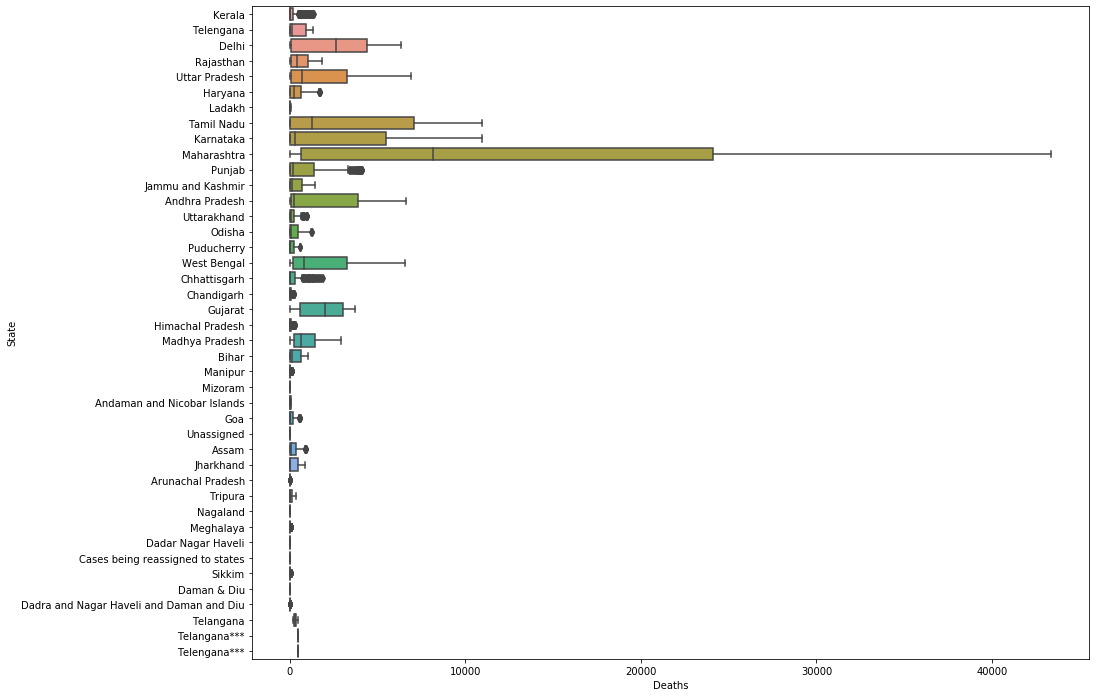

In [154]:
plt.subplots(figsize=(15,12))
sns.boxplot(x="Deaths", y="State",data=cvd)

#### inference: From the above graph we can see the state: Maharashtra has witnessed the highest number of deaths followed by Tamil Nadu.

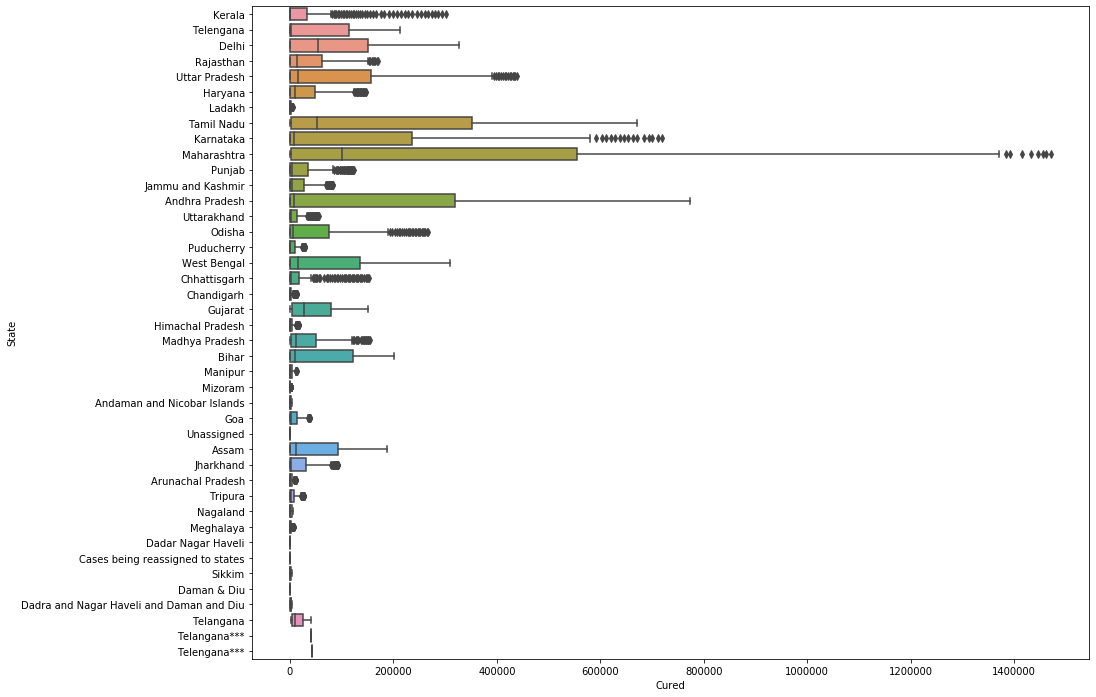

In [155]:
plt.subplots(figsize=(15,12))
sns.boxplot(x="Cured", y="State",data=cvd)

#### inference: From the above graph we can see the state: Maharashtra has witnessed the most cured no of cases followed by Karnataka.

## Bar plot

Text(0.5, 0, 'State/UnionTerritory')

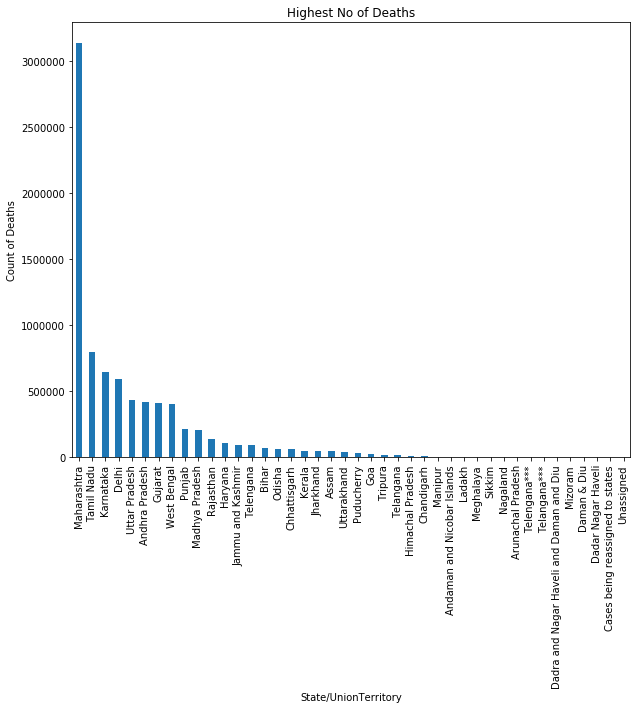

In [156]:
plt.subplots(figsize=(10,8))

cvd.Deaths.groupby(cvd.State).sum().sort_values(ascending=False).plot(kind='bar')

plt.title('Highest No of Deaths')
plt.ylabel('Count of Deaths')
plt.xlabel('State/UnionTerritory')

Text(0.5, 0, 'State/UnionTerritory')

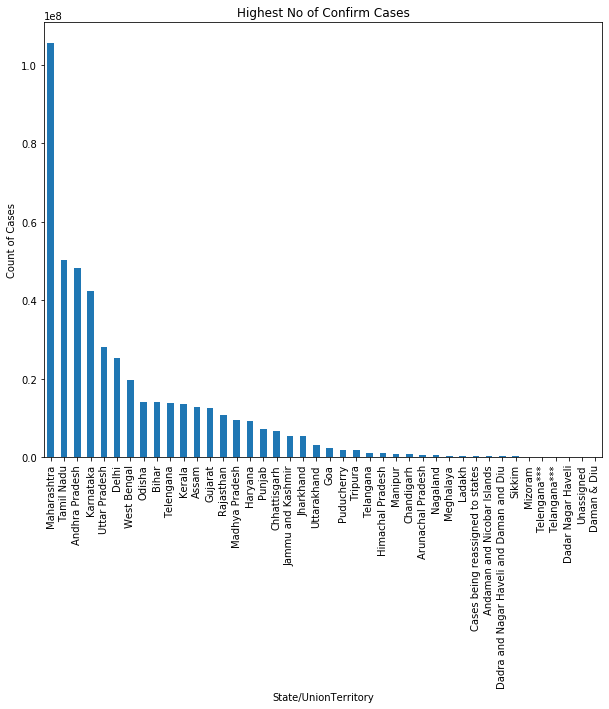

In [157]:
plt.subplots(figsize=(10,8))

cvd.Confirmed.groupby(cvd.State).sum().sort_values(ascending=False).plot(kind='bar')

plt.title('Highest No of Confirm Cases')
plt.ylabel('Count of Cases')
plt.xlabel('State/UnionTerritory')

Text(0.5, 0, 'State/UnionTerritory')

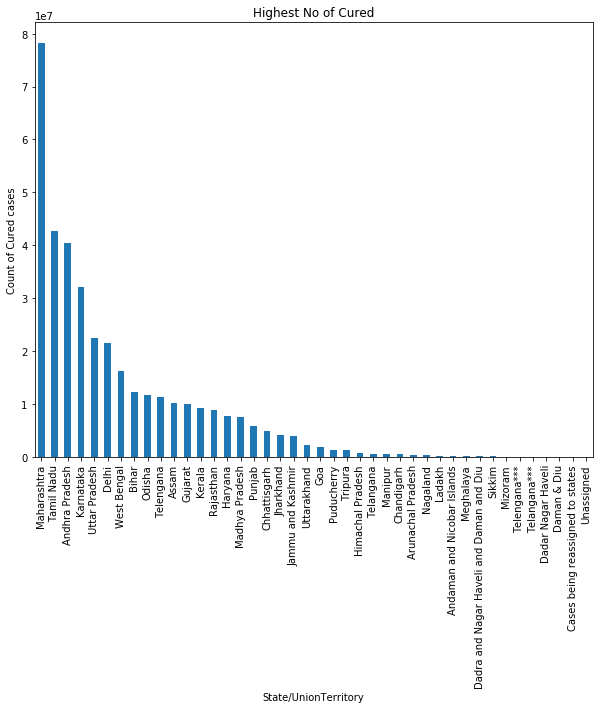

In [158]:
plt.subplots(figsize=(10,8))

cvd.Cured.groupby(cvd.State).sum().sort_values(ascending=False).plot(kind='bar')

plt.title('Highest No of Cured')
plt.ylabel('Count of Cured cases')
plt.xlabel('State/UnionTerritory')

### Inference: Clearly we can see that Maharashtra is the most affected state for Covid fom Marc 2020 - October 2020 when compared with other States and Union territories.